In [1]:
import vtk
def write_rectilinear_vtk(X, Y, data_dict, filename):
    # Create the rectilinear grid
    grid = vtk.vtkRectilinearGrid()
    grid.SetDimensions(len(X), len(Y), 1)

    # Set the coordinates for the grid
    x_coords = vtk.vtkDoubleArray()
    y_coords = vtk.vtkDoubleArray()
    z_coords = vtk.vtkDoubleArray()

    for i in range(len(X)):
        x_coords.InsertNextValue(X[i])
    for j in range(len(Y)):
        y_coords.InsertNextValue(Y[j])
    z_coords.InsertNextValue(0)  # Since it's a 2D grid, Z is constant

    grid.SetXCoordinates(x_coords)
    grid.SetYCoordinates(y_coords)
    grid.SetZCoordinates(z_coords)

    # Add each data array to the grid
    for name, data in data_dict.items():
        data_array = vtk.vtkDoubleArray()
        data_array.SetNumberOfComponents(1)
        data_array.SetName(name)

        for value in data.flatten():
            data_array.InsertNextValue(value)

        grid.GetPointData().AddArray(data_array)

    # Write the grid to a VTK file
    writer = vtk.vtkRectilinearGridWriter()
    writer.SetFileName(filename)
    writer.SetInputData(grid)
    writer.Write()

    print(f"VTK file '{filename}' written successfully.")

ModuleNotFoundError: No module named 'vtk'

profiles\meanprofile0.csv
profiles\meanprofile1.csv
profiles\meanprofile2.csv
profiles\meanprofile3.csv
profiles\meanprofile4.csv
profiles\meanprofile5.csv
profiles\meanprofile6.csv
profiles\meanprofile7.csv
profiles\meanprofile8.csv
profiles\meanprofile9.csv
profiles\meanprofile10.csv
profiles\meanprofile11.csv
profiles\meanprofile12.csv
profiles\meanprofile13.csv
profiles\meanprofile14.csv
profiles\meanprofile15.csv
profiles\meanprofile16.csv
profiles\meanprofile17.csv
profiles\meanprofile18.csv
profiles\meanprofile19.csv
profiles\meanprofile20.csv
profiles\meanprofile21.csv
profiles\meanprofile22.csv
profiles\meanprofile23.csv
profiles\meanprofile24.csv
profiles\meanprofile25.csv
profiles\meanprofile26.csv
profiles\meanprofile27.csv
profiles\meanprofile28.csv
profiles\meanprofile29.csv
profiles\meanprofile30.csv
profiles\meanprofile31.csv
profiles\meanprofile32.csv
profiles\meanprofile33.csv
profiles\meanprofile34.csv
profiles\meanprofile35.csv
profiles\meanprofile36.csv
profiles\me

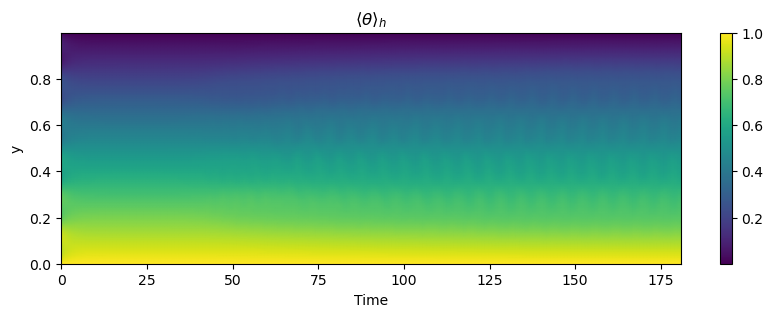

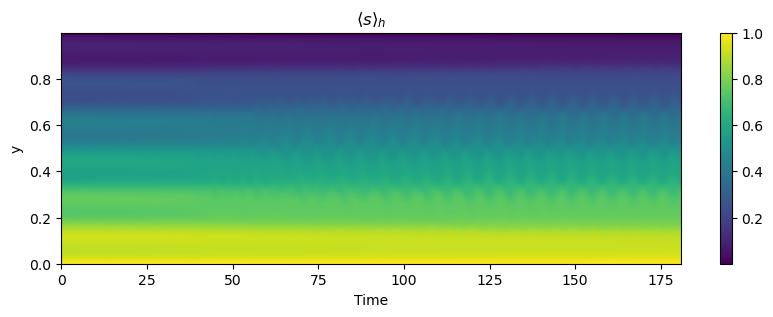

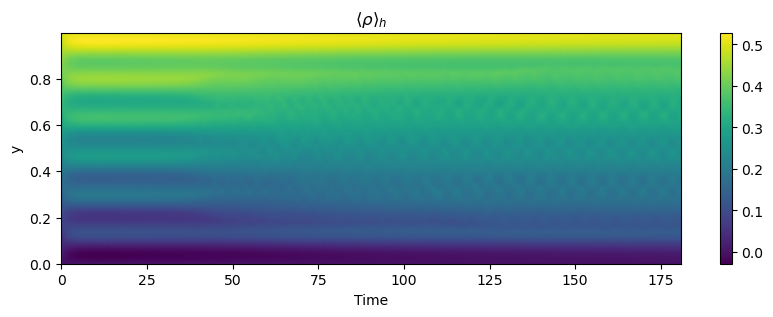

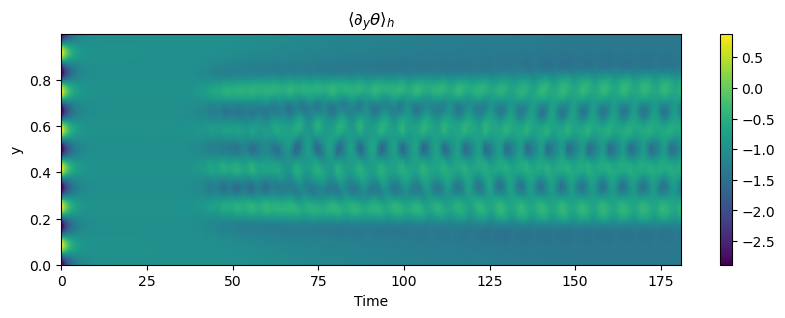

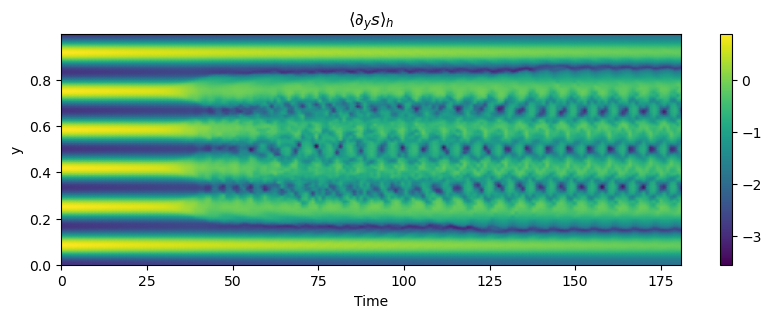

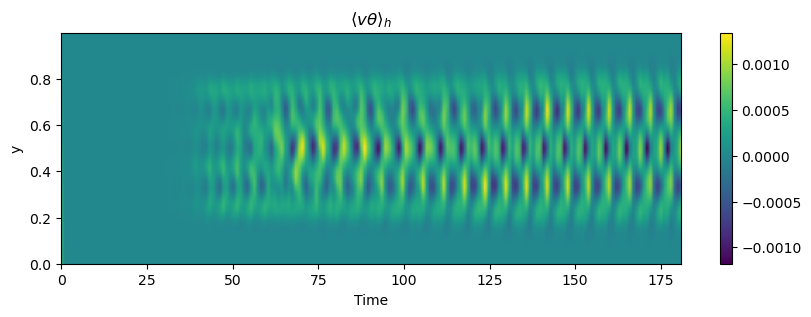

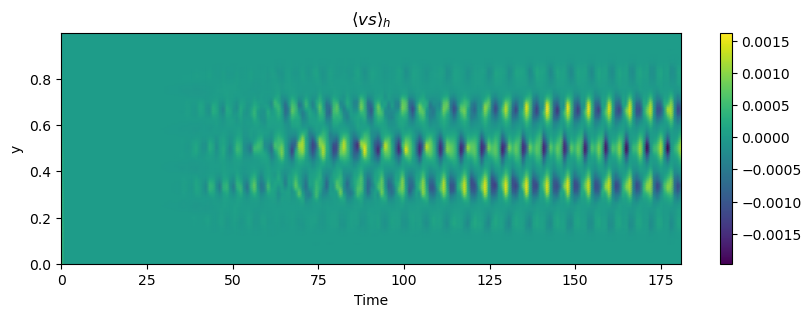

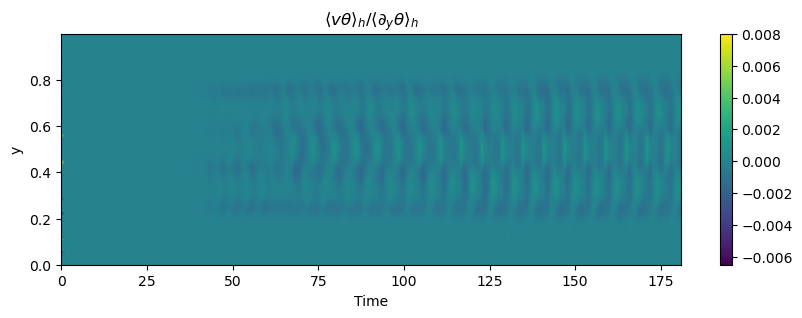

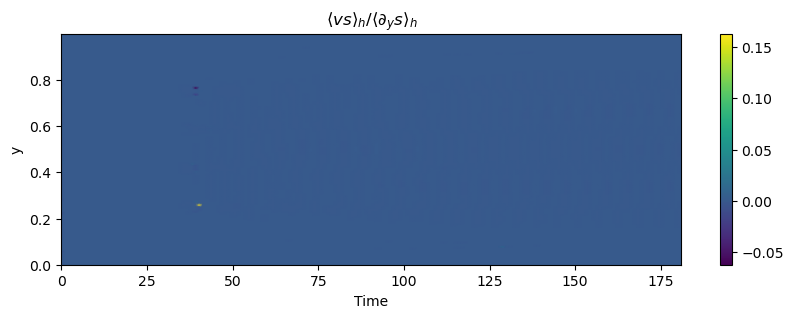

In [1]:
# to run: python3 plot_meanprofiles.py
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import re

def numerical_sort(value):
    numbers = re.findall(r'\d+', value)
    return int(numbers[0]) if numbers else 0

# Get the list of all CSV files in the directory
file_list = glob.glob('profiles/meanprofile*.csv')
file_list.sort(key=numerical_sort)
nstep = len(file_list)

# Initialize an empty list to store the dataframes
T_mean = []
S_mean = []
T_gradient = []
S_gradient = []
T_flux = []
S_flux = []

y = []

# Loop through each file and read it into a dataframe
for file in file_list:
    print(file)
    df = pd.read_csv(file, skiprows=1)
    array = df.values
    y = array[:,0]
    
    T_mean.append(array[:,1])
    S_mean.append(array[:,2])
    T_gradient.append(array[:,3])
    S_gradient.append(array[:,4])
    T_flux.append(array[:,5])
    S_flux.append(array[:,6])
    
T_mean = np.array(T_mean)
S_mean = np.array(S_mean)
T_gradient = np.array(T_gradient)
S_gradient = np.array(S_gradient)
T_flux = np.array(T_flux)
S_flux = np.array(S_flux)

Dens_mean = (S_mean-T_mean)+(1-0.5)*y
T_turbDiff = T_flux / T_gradient               # turbulent diffusivity
S_turbDiff = S_flux / S_gradient               # turbulent diffusivity

t = np.linspace(0, nstep, nstep) 

data_dict = {"T_mean": T_mean,
             "S_mean": S_mean,
             "T_gradient": T_gradient,
             "S_gradient": S_gradient,
             "T_flux": T_flux,
             "S_flux": T_flux}


X, Y = np.meshgrid(t, y)

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_mean.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_mean.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle s\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,Dens_mean.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\rho\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_gradient.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\partial_y \theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_gradient.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle\partial_y s\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_flux.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v \theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_flux.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v s\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,T_turbDiff.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v \theta\rangle_h / \langle\partial_y \theta\rangle_h$')
plt.show()

plt.figure(figsize=(10, 3))
plt.pcolormesh(X,Y,S_turbDiff.T, cmap='viridis',shading='gouraud')
plt.colorbar()
plt.xlabel('Time')
plt.ylabel('y')
plt.title(r'$\langle v s\rangle_h / \langle\partial_y s\rangle_h$')
plt.show()

In [ ]:
import sympy as sp
import numpy as np

# Define the variables
y, R = sp.symbols('y R')

# Define the function
f = -1/2 * (sp.tanh(R*(y - 1/3)) + sp.tanh(R*(y + 1/3)))
# f = sp.tanh(R*(y - 1/3))
# f = sp.tanh(R*(y + 1/3))
# f = (sp.tanh(R*(y - 1/3)) + sp.tanh(R*(y + 1/3)))
# Expand the function using Taylor series
f_approx = sp.expand(f.series(y, 0, 4))

print(f_approx)

-1.0*R*y + 1.0*R*y*tanh(0.333333333333333*R)**2 + 0.333333333333333*R**3*y**3 - 1.33333333333333*R**3*y**3*tanh(0.333333333333333*R)**2 + 1.0*R**3*y**3*tanh(0.333333333333333*R)**4 + O(y**4)
